# Data Cleaning

## 1. Loading the Data

In [68]:
import pandas as pd
import numpy as np

In [69]:
forest_area = pd.read_csv("dataset/Forest Area.csv")
freshwater = pd.read_csv("dataset/Freshwater.csv", skiprows=3)
gdp_per_capita = pd.read_csv("dataset/gdp_per_capita.csv")
governance = pd.read_csv("dataset/Governance.csv")
human_development_index = pd.read_csv("dataset/human-development-index.csv")
sustainable_energy = pd.read_csv("dataset/Sustainable energy for all.csv", skiprows=3)
emissions = pd.read_csv("dataset/trends_in_greenhouse_gas_emissions.csv", skiprows=3)

## 2. Choosing Relevant Variables

This is done based on the theoretical framework. As the datasets I have mostly encompasses a wide range of different variables, I will be omitting the ones that are not used and also take the most recent data only.

### Forest Area - 2020 Forest Area

In [70]:
# Forest area
forest_area_filtered = forest_area[['Country and Area', 'Forest Area, 2020 (1000 ha)']]
forest_area_filtered = forest_area_filtered.rename(columns={'Country and Area': 'Country'})
forest_area_filtered.head()

,Country,"Forest Area, 2020 (1000 ha)"
0,WORLD,4058930.81
1,Afghanistan,1208.44
2,Albania,788.90
3,Algeria,1949.00
4,American Samoa,17.13


### Freshwater

In [71]:
freshwater_filtered = freshwater[['Country', 'Internal renewable freshwater resources flows 2020']]
freshwater_filtered.head()

,Country,Internal renewable freshwater resources flows 2020
0,Afghanistan,47.2
1,Albania,26.9
2,Algeria,11.2
3,American Samoa,..
4,Andorra,0.3


### GDP per Capita

In [72]:
gdp_per_capita_filtered = gdp_per_capita[['Country Name', '2021 [YR2021]']]
gdp_per_capita_filtered = gdp_per_capita_filtered.rename(columns={'Country Name': 'Country'})
gdp_per_capita_filtered = gdp_per_capita_filtered.rename(columns={'2021 [YR2021]': 'GDP per Capita 2021'})
gdp_per_capita_filtered.head()

,Country,GDP per Capita 2021
0,Afghanistan,355.777826392648
1,Albania,6377.20309553753
2,Algeria,3700.31469728198
3,American Samoa,16653.7137781725
4,Andorra,42072.3194231234


### Governance

In [73]:
governance_filtered = governance[['Country and area', 'Paris Agreement', 'UN Framework Convention on Climate Change']]
governance_filtered = governance_filtered.rename(columns={'Country and area': 'Country'})
governance_filtered.head()

,Country,Paris Agreement,UN Framework Convention on Climate Change
0,Afghanistan,2017,2002
1,Albania,2016,1994
2,Algeria,2016,1993
3,Andorra,2017,2011
4,Angola,...,2000


### Human Development Index

In [74]:
human_development_index_filtered = human_development_index.loc[human_development_index['Year'] == 2022]
human_development_index_filtered = human_development_index_filtered[['Entity', 'Human Development Index']]
human_development_index_filtered = human_development_index_filtered.rename(columns={'Entity': 'Country'})
human_development_index_filtered.head()

,Country,Human Development Index
32,Afghanistan,0.462
65,Albania,0.789
98,Algeria,0.745
121,Andorra,0.884
145,Angola,0.591


### Sustainable Energy

In [75]:
sustainable_energy_filtered = sustainable_energy[['Country', 'Access to clean fuels and technologies for cooking 2021', 'Renewable energy consumption 2020']]
sustainable_energy_filtered.head()

,Country,Access to clean fuels and technologies for cooking 2021,Renewable energy consumption 2020
0,Afghanistan,35.4,17.6
1,Albania,83.7,44.6
2,Algeria,99.7,0.2
3,American Samoa,..,0.5
4,Andorra,100,21.9


### Emissions

In [76]:
emissions_filtered = emissions[['Country', 'Carbon dioxide emissions 2020', 'Methane emissions 2020', 'Nitrous oxide emissions 2020']]
emissions_filtered.head()

,Country,Carbon dioxide emissions 2020,Methane emissions 2020,Nitrous oxide emissions 2020
0,Afghanistan,8709.47,16222.03596,4863.386801
1,Albania,4383.2,2692.195886,1015.186729
2,Algeria,161563,86543.92362,12578.7476
3,American Samoa,..,..,..
4,Andorra,448.884399,53.600959,1.758811


## 3. Merge Datasets

Remove unnecessary rows after last country (Zimbabwe) for Freshwater, Sustainable Energy, and Emissions dataset

In [77]:
freshwater_filtered = freshwater_filtered.loc[:freshwater_filtered[freshwater_filtered['Country'] == 'Zimbabwe'].index[0]]
freshwater_filtered

,Country,Internal renewable freshwater resources flows 2020
0,Afghanistan,47.2
1,Albania,26.9
2,Algeria,11.2
3,American Samoa,..
4,Andorra,0.3
...,...,...
209,Virgin Islands (U.S.),..
210,West Bank and Gaza,0.8
211,"Yemen, Rep.",2.1
212,Zambia,80.2


In [78]:
sustainable_energy_filtered = sustainable_energy_filtered.loc[:sustainable_energy_filtered[sustainable_energy_filtered['Country'] == 'Zimbabwe'].index[0]]
sustainable_energy_filtered

,Country,Access to clean fuels and technologies for cooking 2021,Renewable energy consumption 2020
0,Afghanistan,35.4,17.6
1,Albania,83.7,44.6
2,Algeria,99.7,0.2
3,American Samoa,..,0.5
4,Andorra,100,21.9
...,...,...,...
209,Virgin Islands (U.S.),..,5.1
210,West Bank and Gaza,..,15
211,"Yemen, Rep.",61.3,3.5
212,Zambia,10.2,81.8


In [79]:
emissions_filtered = emissions_filtered.loc[:emissions_filtered[emissions_filtered['Country'] == 'Zimbabwe'].index[0]]
emissions_filtered

,Country,Carbon dioxide emissions 2020,Methane emissions 2020,Nitrous oxide emissions 2020
0,Afghanistan,8709.47,16222.03596,4863.386801
1,Albania,4383.2,2692.195886,1015.186729
2,Algeria,161563,86543.92362,12578.7476
3,American Samoa,..,..,..
4,Andorra,448.884399,53.600959,1.758811
...,...,...,...,...
209,Virgin Islands (U.S.),..,..,..
210,West Bank and Gaza,..,..,..
211,"Yemen, Rep.",9960.1,10542.15376,3364.858401
212,Zambia,7607.1,15448.75233,12363.49464


Get standardised country names map to merge data into one CSV file as each datasets might have different conventions on naming the countries. 

I did this with the help of GPT-4, but it was not entirely accurate so I also had to input some of the key-value pairs manually.

In [80]:
country_name_mapping = {
    "Bahamas, The": "Bahamas",
    "Bolivia": "Bolivia (Plurinational State of)",
    "Brunei": "Brunei Darussalam",
    "Congo, Dem. Rep.": "Democratic Republic of the Congo",
    "Congo, Democratic Republic of the": "Democratic Republic of the Congo",
    "The Democratic Republic of the Congo": "Democratic Republic of the Congo",
    "Democratic Republic of Congo": "Democratic Republic of the Congo",
    "Congo, Rep.": "Congo",
    "Congo, Republic of": "Congo",
    "Cape Verde": "Cabo Verde",
    "Cote d'Ivoire": "Côte d’Ivoire",
    "Ivory Coast": "Côte d’Ivoire",
    "Czech Republic": "Czechia",
    "Gambia, The": "Gambia",
    "Korea, Rep.": "Republic of Korea",
    "Korea, Republic of": "Republic of Korea",
    "South Korea": "Republic of Korea",
    "Korea, Dem. People's Rep.": "Democratic People's Republic of Korea",
    "North Korea": "Democratic People's Republic of Korea",
    "Iran, Islamic Rep.": "Iran (Islamic Republic of)",
    "Iran": "Iran (Islamic Republic of)",
    "Lao PDR": "Lao People's Democratic Republic",
    "Lao": "Lao People's Democratic Republic",
    "Laos": "Lao People's Democratic Republic",
    "Micronesia, Fed. Sts.": "Micronesia (Federated States of)",
    "Micronesia": "Micronesia (Federated States of)",
    "Micronesia (country)": "Micronesia (Federated States of)",
    "Moldova": "Republic of Moldova",
    "Palestine, State of": "State of Palestine",
    "St. Kitts and Nevis": "Saint Kitts and Nevis",
    "St. Lucia": "Saint Lucia",
    "St. Vincent and the Grenadines": "Saint Vincent and the Grenadines",
    "Turkiye": "Turkey",
    "Tanzania": "United Republic of Tanzania",
    "Venezuela, RB": "Venezuela",
    "Yemen, Rep.": "Yemen",
    "Syria": "Syrian Arab Republic",
    "Egypt, Arab Rep.": "Egypt",
    "Kyrgyz Republic": "Kyrgyzstan",
    "Slovak Republic": "Slovakia",
    "Russia": "Russian Federation",
    "United Kingdom": "United Kingdom of Great Britain and Northern Ireland",
    "United States": "United States of America",
    "East Timor": "Timor-Leste",
    "Vietnam": "Viet Nam",
    "Venezuela": "Venezuela (Bolivarian Republic of)",
    "Venezuela, RB": "Venezuela (Bolivarian Republic of)",
    "West Bank and Gaza": "State of Palestine",
    "Palestine": "State of Palestine",
}

In [81]:
print("Forest Area: ", len(forest_area_filtered))
print("Freshwater: ", len(freshwater_filtered))
print("GDP per Capita: ", len(gdp_per_capita_filtered))
print("Governance: ", len(governance_filtered))
print("HDI: ", len(human_development_index_filtered))
print("Sustainable Energy: ", len(sustainable_energy_filtered))
print("Emissions: ", len(emissions_filtered))

Forest Area:  237
Freshwater:  214
GDP per Capita:  271
Governance:  194
HDI:  204
Sustainable Energy:  214
Emissions:  214


As the Governance dataset has the least amount of countries, I'm going to use countries from the Governance dataset as the base country list for the merged data.

In [82]:
countries_list = governance_filtered['Country'].unique()
countries_list

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'Costa Rica', 'Côte d’Ivoire',
       'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'G

Map the country names from other datasets to match the country name in the Governance dataset.

In [83]:
forest_area_filtered.loc[:, 'Country'] = forest_area_filtered['Country'].replace(country_name_mapping)
forest_area_filtered = forest_area_filtered[forest_area_filtered['Country'].isin(countries_list)]
len(forest_area_filtered)

194

In [84]:
freshwater_filtered.loc[:, 'Country'] = freshwater_filtered['Country'].replace(country_name_mapping)
freshwater_filtered = freshwater_filtered[freshwater_filtered['Country'].isin(countries_list)]
len(freshwater_filtered)

193

In [85]:
gdp_per_capita_filtered.loc[:, 'Country'] = gdp_per_capita_filtered['Country'].replace(country_name_mapping)
gdp_per_capita_filtered = gdp_per_capita_filtered[gdp_per_capita_filtered['Country'].isin(countries_list)]
len(gdp_per_capita_filtered)

194

In [86]:
human_development_index_filtered.loc[:, 'Country'] = human_development_index_filtered['Country'].replace(country_name_mapping)
human_development_index_filtered = human_development_index_filtered[human_development_index_filtered['Country'].isin(countries_list)]
len(human_development_index_filtered)

192

In [87]:
sustainable_energy_filtered.loc[:, 'Country'] = sustainable_energy_filtered['Country'].replace(country_name_mapping)
sustainable_energy_filtered = sustainable_energy_filtered[sustainable_energy_filtered['Country'].isin(countries_list)]
len(sustainable_energy_filtered)

193

In [88]:
emissions_filtered.loc[:, 'Country'] = emissions_filtered['Country'].replace(country_name_mapping)
emissions_filtered = emissions_filtered[emissions_filtered['Country'].isin(countries_list)]
len(emissions_filtered)

193

In [89]:
freshwater_countries = freshwater_filtered['Country'].unique()
missing_countries = list(set(countries_list) - set(freshwater_countries))
missing_countries

['Nauru']

Input missing country rows with null value to the dataset

In [90]:
nauru_df = pd.DataFrame([['Nauru', np.nan]], columns=['Country', 'Internal renewable freshwater resources flows 2020'])
freshwater_filtered = pd.concat([freshwater_filtered, nauru_df], ignore_index=True)

In [91]:
sustainable_energy_countries = sustainable_energy_filtered['Country'].unique()
missing_countries = list(set(countries_list) - set(sustainable_energy_countries))
missing_countries

['Nauru']

In [92]:
nauru_df = pd.DataFrame([['Nauru', np.nan, np.nan]], columns=['Country', 'Access to clean fuels and technologies for cooking 2021', 'Renewable energy consumption 2020'])
sustainable_energy_filtered = pd.concat([sustainable_energy_filtered, nauru_df], ignore_index=True)

In [93]:
emissions_countries = emissions_filtered['Country'].unique()
missing_countries = list(set(countries_list) - set(emissions_countries))
missing_countries

['Nauru']

In [94]:
nauru_df = pd.DataFrame([['Nauru', np.nan, np.nan, np.nan]], columns=['Country', 'Carbon dioxide emissions 2020', 'Methane emissions 2020', 'Nitrous oxide emissions 2020'])
emissions_filtered = pd.concat([emissions_filtered, nauru_df], ignore_index=True)

In [95]:
hdi_countries = human_development_index_filtered['Country'].unique()
missing_countries = list(set(countries_list) - set(hdi_countries))
missing_countries

['Monaco', "Democratic People's Republic of Korea"]

In [96]:
monaco_df = pd.DataFrame([['Monaco', np.nan]], columns=['Country', 'Human Development Index'])
dprk_df = pd.DataFrame([["Democratic People's Republic of Korea", np.nan]], columns=['Country', 'Human Development Index'])
human_development_index_filtered = pd.concat([human_development_index_filtered, monaco_df, dprk_df], ignore_index=True)

So in conclusion, I am going to have a total of 194 countries included in the data after inputting the missing countries for each dataset.

Add regional groups data

In [97]:
regional_groups = pd.read_csv("dataset/un-regional-groups.csv")
regional_groups = regional_groups.rename(columns={'Name': 'Country'})
regional_groups = regional_groups[['Country', 'Region']]

In [98]:
from functools import reduce

In [99]:
dfs = [regional_groups, forest_area_filtered, freshwater_filtered, gdp_per_capita_filtered, governance_filtered, human_development_index_filtered, sustainable_energy_filtered, emissions_filtered]
merge_dfs = lambda left, right: pd.merge(left, right, on='Country', how='inner')
lcdci_df = reduce(merge_dfs, dfs)
lcdci_df

,Country,Region,"Forest Area, 2020 (1000 ha)",Internal renewable freshwater resources flows 2020,GDP per Capita 2021,Paris Agreement,UN Framework Convention on Climate Change,Human Development Index,Access to clean fuels and technologies for cooking 2021,Renewable energy consumption 2020,Carbon dioxide emissions 2020,Methane emissions 2020,Nitrous oxide emissions 2020
0,Algeria,African Group,1949.00,11.2,3700.31469728198,2016,1993,0.745,99.7,0.2,161563,86543.92362,12578.7476
1,Angola,African Group,66607.38,148,1927.47407832091,...,2000,0.591,50,61,19814.5,32703.23811,17757.86784
2,Benin,African Group,3135.15,10.3,1360.91147421492,2016,1994,0.504,4.6,46.2,7980.4,4029.619412,3007.644632
3,Botswana,African Group,15254.70,2.4,7238.79609753108,2016,1994,0.708,65.7,27.2,5763.687,3434.49382,2963.633551
4,Burkina Faso,African Group,6216.40,12.5,888.781078836766,2016,1993,0.438,11.7,67.5,5456.7,15408.27314,10060.67193
...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Sweden,WEOG,27980.00,171,61417.6808766469,2016,1993,0.952,100,58.4,33576.1,4792.09356,6381.072374
190,Switzerland,WEOG,1269.11,40.4,93446.4344518943,2017,1993,0.967,100,26.4,34916.1,4975.239558,2396.71253
191,Turkey,WEOG,22220.36,227,9743.21313092428,...,2004,0.855,95.4,13.7,407406.2,50444.76645,38132.07296
192,United Kingdom of Great Britain and Northern I...,WEOG,3190.00,145,46869.759058411,2016,1993,0.940,100,13.5,308650.3,50415.67463,27696.68924


Rename column headings for consistency

In [100]:
lcdci_df = lcdci_df.rename(columns={'Country': 'country'})
lcdci_df = lcdci_df.rename(columns={'Forest Area, 2020 (1000 ha)': 'forest_area'})
lcdci_df = lcdci_df.rename(columns={'Internal renewable freshwater resources flows 2020': 'freshwater'})
lcdci_df = lcdci_df.rename(columns={'GDP per Capita 2021': 'gdp_per_capita'})
lcdci_df = lcdci_df.rename(columns={'Paris Agreement': 'paris_agreement'})
lcdci_df = lcdci_df.rename(columns={'UN Framework Convention on Climate Change': 'unfccc'})
lcdci_df = lcdci_df.rename(columns={'Human Development Index': 'hdi'})
lcdci_df = lcdci_df.rename(columns={'Access to clean fuels and technologies for cooking 2021': 'cooking_clean_fuel_and_technologies_access'})
lcdci_df = lcdci_df.rename(columns={'Renewable energy consumption 2020': 'renewable_energy_consumption'})
lcdci_df = lcdci_df.rename(columns={'Carbon dioxide emissions 2020': 'co2_emissions'})
lcdci_df = lcdci_df.rename(columns={'Methane emissions 2020': 'methane_emissions'})
lcdci_df = lcdci_df.rename(columns={'Nitrous oxide emissions 2020': 'nitrous_oxide_emissions'})
lcdci_df = lcdci_df.rename(columns={'Region': 'region'})


## 4. Handling Missing Values

In [101]:
lcdci_df.dtypes

country                                        object
region                                         object
forest_area                                   float64
freshwater                                     object
gdp_per_capita                                 object
paris_agreement                                object
unfccc                                          int64
hdi                                           float64
cooking_clean_fuel_and_technologies_access     object
renewable_energy_consumption                   object
co2_emissions                                  object
methane_emissions                              object
nitrous_oxide_emissions                        object
dtype: object

Handle missing values in columns by marking it as NaN and convert to suitable type

In [102]:
lcdci_df["freshwater"] = lcdci_df["freshwater"].replace("..", np.nan)
lcdci_df["freshwater"] = lcdci_df["freshwater"].astype(float)

In [103]:
lcdci_df["gdp_per_capita"] = lcdci_df["gdp_per_capita"].replace("..", np.nan)
lcdci_df["gdp_per_capita"] = lcdci_df["gdp_per_capita"].astype(float)

* One hot encode the Paris Agreement (0: not agreed, 1: agreed)

In [104]:
lcdci_df["paris_agreement"] = lcdci_df["paris_agreement"].replace("..", 0) 
lcdci_df["paris_agreement"] = lcdci_df["paris_agreement"].apply(lambda x: 1 if x != 0 else 0) 

In [105]:
lcdci_df["cooking_clean_fuel_and_technologies_access"] = lcdci_df["cooking_clean_fuel_and_technologies_access"].replace("..", np.nan)
lcdci_df["cooking_clean_fuel_and_technologies_access"] = lcdci_df["cooking_clean_fuel_and_technologies_access"].astype(float)

In [106]:
lcdci_df["renewable_energy_consumption"] = lcdci_df["renewable_energy_consumption"].replace("..", np.nan)
lcdci_df["renewable_energy_consumption"] = lcdci_df["renewable_energy_consumption"].astype(float)

In [107]:
lcdci_df["co2_emissions"] = lcdci_df["co2_emissions"].replace("..", np.nan)
lcdci_df["co2_emissions"] = lcdci_df["co2_emissions"].astype(float)

In [108]:
lcdci_df["methane_emissions"] = lcdci_df["methane_emissions"].replace("..", np.nan)
lcdci_df["methane_emissions"] = lcdci_df["methane_emissions"].astype(float)

In [109]:
lcdci_df["nitrous_oxide_emissions"] = lcdci_df["nitrous_oxide_emissions"].replace("..", np.nan)
lcdci_df["nitrous_oxide_emissions"] = lcdci_df["nitrous_oxide_emissions"].astype(float)

In [110]:
lcdci_df.isnull().sum()

country                                        0
region                                         0
forest_area                                    0
freshwater                                    13
gdp_per_capita                                 5
paris_agreement                                0
unfccc                                         0
hdi                                            2
cooking_clean_fuel_and_technologies_access     6
renewable_energy_consumption                   3
co2_emissions                                  4
methane_emissions                              4
nitrous_oxide_emissions                        4
dtype: int64

In [111]:
lcdci_df.dtypes

country                                        object
region                                         object
forest_area                                   float64
freshwater                                    float64
gdp_per_capita                                float64
paris_agreement                                 int64
unfccc                                          int64
hdi                                           float64
cooking_clean_fuel_and_technologies_access    float64
renewable_energy_consumption                  float64
co2_emissions                                 float64
methane_emissions                             float64
nitrous_oxide_emissions                       float64
dtype: object

In [112]:
# Filter rows where freshwater is empty
freshwater_missing = lcdci_df[lcdci_df['freshwater'].isnull()]
freshwater_missing


,country,region,forest_area,freshwater,gdp_per_capita,paris_agreement,unfccc,hdi,cooking_clean_fuel_and_technologies_access,renewable_energy_consumption,co2_emissions,methane_emissions,nitrous_oxide_emissions
41,Seychelles,African Group,33.70,NaN,12963.058980,1,1992,0.802,100.0,1.3,598.700000,94.696179,4.039156
71,Kiribati,Asia-Pacific Group,1.18,NaN,1766.144289,1,1995,0.628,12.4,42.8,56.900000,23.209951,5.124415
78,Marshall Islands,Asia-Pacific Group,9.40,NaN,6130.437137,1,1992,0.731,66.7,12.0,110.000000,31.911030,0.699535
79,Micronesia (Federated States of),Asia-Pacific Group,64.42,NaN,3588.759933,1,1993,0.634,13.3,2.0,107.500000,52.686594,27.549723
82,Nauru,Asia-Pacific Group,0.00,NaN,11632.692502,1,1993,0.696,NaN,NaN,NaN,NaN,NaN
86,Palau,Asia-Pacific Group,41.41,NaN,12921.827321,1,1999,0.797,43.0,0.9,158.200000,19.526302,0.000000
92,Samoa,Asia-Pacific Group,161.67,NaN,3857.689742,1,1994,0.702,37.2,37.5,206.500000,267.323935,50.494426
101,Tonga,Asia-Pacific Group,8.95,NaN,4425.971492,1,1998,0.739,86.8,1.9,118.100000,92.338189,52.268669
104,Tuvalu,Asia-Pacific Group,1.00,NaN,5372.760239,1,1993,0.653,74.6,6.7,6.600000,11.574492,1.443188
123,Montenegro,Eastern European Group,827.00,NaN,9465.961530,1,2006,0.844,62.0,39.6,2527.200000,783.237121,150.663183


In [113]:
hdi_missing = lcdci_df[lcdci_df['hdi'].isnull()]
hdi_missing

,country,region,forest_area,freshwater,gdp_per_capita,paris_agreement,unfccc,hdi,cooking_clean_fuel_and_technologies_access,renewable_energy_consumption,co2_emissions,methane_emissions,nitrous_oxide_emissions
62,Democratic People's Republic of Korea,Asia-Pacific Group,6030.09,67.0,NaN,1,1994,NaN,12.5,12.7,52437.2,18145.48138,2590.047636
182,Monaco,WEOG,0.00,NaN,235132.784182,1,1992,NaN,100.0,NaN,NaN,NaN,NaN


In [114]:
clean_fuel_missing = lcdci_df[lcdci_df['cooking_clean_fuel_and_technologies_access'].isnull()]
clean_fuel_missing

,country,region,forest_area,freshwater,gdp_per_capita,paris_agreement,unfccc,hdi,cooking_clean_fuel_and_technologies_access,renewable_energy_consumption,co2_emissions,methane_emissions,nitrous_oxide_emissions
27,Libya,African Group,217.00,0.7,5908.951323,1,1999,0.746,NaN,3.1,44467.000000,24033.120050,1797.652497
75,Lebanon,Asia-Pacific Group,143.33,4.8,4136.146575,1,1994,0.723,NaN,6.7,21474.900000,3459.013432,846.613935
82,Nauru,Asia-Pacific Group,0.00,NaN,11632.692502,1,1993,0.696,NaN,NaN,NaN,NaN,NaN
89,State of Palestine,Asia-Pacific Group,10.14,0.8,3678.635657,1,2015,0.716,NaN,15.0,NaN,NaN,NaN
115,Bulgaria,Eastern European Group,3893.00,21.0,12219.341871,1,1995,0.799,NaN,21.1,34138.100000,6980.496622,4328.729643
179,Liechtenstein,WEOG,6.70,NaN,197504.548936,1,1994,0.942,NaN,55.2,141.996093,2.588257,0.870988


In [115]:
renewable_energy_missing = lcdci_df[lcdci_df['renewable_energy_consumption'].isnull()]
renewable_energy_missing

,country,region,forest_area,freshwater,gdp_per_capita,paris_agreement,unfccc,hdi,cooking_clean_fuel_and_technologies_access,renewable_energy_consumption,co2_emissions,methane_emissions,nitrous_oxide_emissions
82,Nauru,Asia-Pacific Group,0.0,NaN,11632.692502,1,1993,0.696,NaN,NaN,NaN,NaN,NaN
182,Monaco,WEOG,0.0,NaN,235132.784182,1,1992,NaN,100.0,NaN,NaN,NaN,NaN
187,San Marino,WEOG,1.0,NaN,54982.451715,1,1994,0.867,100.0,NaN,NaN,NaN,NaN


In [116]:
co2_missing = lcdci_df[lcdci_df['co2_emissions'].isnull()]
co2_missing

,country,region,forest_area,freshwater,gdp_per_capita,paris_agreement,unfccc,hdi,cooking_clean_fuel_and_technologies_access,renewable_energy_consumption,co2_emissions,methane_emissions,nitrous_oxide_emissions
82,Nauru,Asia-Pacific Group,0.00,NaN,11632.692502,1,1993,0.696,NaN,NaN,NaN,NaN,NaN
89,State of Palestine,Asia-Pacific Group,10.14,0.8,3678.635657,1,2015,0.716,NaN,15.0,NaN,NaN,NaN
182,Monaco,WEOG,0.00,NaN,235132.784182,1,1992,NaN,100.0,NaN,NaN,NaN,NaN
187,San Marino,WEOG,1.00,NaN,54982.451715,1,1994,0.867,100.0,NaN,NaN,NaN,NaN


In [117]:
methane_missing = lcdci_df[lcdci_df['methane_emissions'].isnull()]
methane_missing

,country,region,forest_area,freshwater,gdp_per_capita,paris_agreement,unfccc,hdi,cooking_clean_fuel_and_technologies_access,renewable_energy_consumption,co2_emissions,methane_emissions,nitrous_oxide_emissions
82,Nauru,Asia-Pacific Group,0.00,NaN,11632.692502,1,1993,0.696,NaN,NaN,NaN,NaN,NaN
89,State of Palestine,Asia-Pacific Group,10.14,0.8,3678.635657,1,2015,0.716,NaN,15.0,NaN,NaN,NaN
182,Monaco,WEOG,0.00,NaN,235132.784182,1,1992,NaN,100.0,NaN,NaN,NaN,NaN
187,San Marino,WEOG,1.00,NaN,54982.451715,1,1994,0.867,100.0,NaN,NaN,NaN,NaN


In [118]:
nitrous_oxide_missing = lcdci_df[lcdci_df['nitrous_oxide_emissions'].isnull()]
nitrous_oxide_missing

,country,region,forest_area,freshwater,gdp_per_capita,paris_agreement,unfccc,hdi,cooking_clean_fuel_and_technologies_access,renewable_energy_consumption,co2_emissions,methane_emissions,nitrous_oxide_emissions
82,Nauru,Asia-Pacific Group,0.00,NaN,11632.692502,1,1993,0.696,NaN,NaN,NaN,NaN,NaN
89,State of Palestine,Asia-Pacific Group,10.14,0.8,3678.635657,1,2015,0.716,NaN,15.0,NaN,NaN,NaN
182,Monaco,WEOG,0.00,NaN,235132.784182,1,1992,NaN,100.0,NaN,NaN,NaN,NaN
187,San Marino,WEOG,1.00,NaN,54982.451715,1,1994,0.867,100.0,NaN,NaN,NaN,NaN


### Imputation of Missing Values

The initial GDP dataset obtained from the World Bank contained missing values for certain countries in the year 2021. To address this, I located the missing data through the United Nations Statistics Division. I manually imputed these values into the primary dataset to create a more complete picture for my analysis.

In [119]:
lcdci_df.loc[lcdci_df['country'] == "Cuba", 'gdp_per_capita'] = 11255
lcdci_df.loc[lcdci_df['country'] == "Democratic People's Republic of Korea", 'gdp_per_capita'] = 654
lcdci_df.loc[lcdci_df['country'] == "Eritrea", 'gdp_per_capita'] = 611
lcdci_df.loc[lcdci_df['country'] == "South Sudan", 'gdp_per_capita'] = 399
lcdci_df.loc[lcdci_df['country'] == "Venezuela (Bolivarian Republic of)", 'gdp_per_capita'] = 3967

In [120]:
lcdci_df.isnull().sum()

country                                        0
region                                         0
forest_area                                    0
freshwater                                    13
gdp_per_capita                                 0
paris_agreement                                0
unfccc                                         0
hdi                                            2
cooking_clean_fuel_and_technologies_access     6
renewable_energy_consumption                   3
co2_emissions                                  4
methane_emissions                              4
nitrous_oxide_emissions                        4
dtype: int64

Remove countries with more than 50% columns missing in crucial variables for the index, which are columns that relates to the environmental aspect

In [121]:
environmental_related_columns = [
    "cooking_clean_fuel_and_technologies_access", 
    "renewable_energy_consumption", 
    "co2_emissions", 
    "methane_emissions", 
    "nitrous_oxide_emissions",
    "freshwater",
    "forest_area"
]

threshold = 4

missing_counts = lcdci_df[environmental_related_columns].isnull().sum(axis=1)

lcdci_df_filtered = lcdci_df[missing_counts <= threshold] 

dropped_countries = lcdci_df.loc[missing_counts > threshold, 'country'] 
print(f"Dropped countries due to excessive missing data: {list(dropped_countries)}")

lcdci_df_filtered = lcdci_df_filtered.reset_index(drop=True)

lcdci_df_filtered

Dropped countries due to excessive missing data: ['Nauru', 'Monaco', 'San Marino']


,country,region,forest_area,freshwater,gdp_per_capita,paris_agreement,unfccc,hdi,cooking_clean_fuel_and_technologies_access,renewable_energy_consumption,co2_emissions,methane_emissions,nitrous_oxide_emissions
0,Algeria,African Group,1949.00,11.2,3700.314697,1,1993,0.745,99.7,0.2,161563.000,86543.923620,12578.747600
1,Angola,African Group,66607.38,148.0,1927.474078,1,2000,0.591,50.0,61.0,19814.500,32703.238110,17757.867840
2,Benin,African Group,3135.15,10.3,1360.911474,1,1994,0.504,4.6,46.2,7980.400,4029.619412,3007.644632
3,Botswana,African Group,15254.70,2.4,7238.796098,1,1994,0.708,65.7,27.2,5763.687,3434.493820,2963.633551
4,Burkina Faso,African Group,6216.40,12.5,888.781079,1,1993,0.438,11.7,67.5,5456.700,15408.273140,10060.671930
...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,Sweden,WEOG,27980.00,171.0,61417.680877,1,1993,0.952,100.0,58.4,33576.100,4792.093560,6381.072374
187,Switzerland,WEOG,1269.11,40.4,93446.434452,1,1993,0.967,100.0,26.4,34916.100,4975.239558,2396.712530
188,Turkey,WEOG,22220.36,227.0,9743.213131,1,2004,0.855,95.4,13.7,407406.200,50444.766450,38132.072960
189,United Kingdom of Great Britain and Northern I...,WEOG,3190.00,145.0,46869.759058,1,1993,0.940,100.0,13.5,308650.300,50415.674630,27696.689240


For the imputation of missing values, I decided to use the MICE algorithm due to it being a robust, informative method of dealing with missing data in datasets.

In [122]:
from fancyimpute import IterativeImputer 

In [123]:
mice_imputer = IterativeImputer() 
lcdci_df_imputed = mice_imputer.fit_transform(lcdci_df_filtered.iloc[:, 2:])
lcdci_df_imputed = pd.DataFrame(lcdci_df_imputed, columns=lcdci_df_filtered.columns[2:])
lcdci_df_imputed.insert(0, "country", lcdci_df_filtered["country"])
lcdci_df_imputed.insert(1, "region", lcdci_df_filtered["region"])
lcdci_df_imputed.head()

,country,region,forest_area,freshwater,gdp_per_capita,paris_agreement,unfccc,hdi,cooking_clean_fuel_and_technologies_access,renewable_energy_consumption,co2_emissions,methane_emissions,nitrous_oxide_emissions
0,Algeria,African Group,1949.00,11.2,3700.314697,1.0,1993.0,0.745,99.7,0.2,161563.000,86543.923620,12578.747600
1,Angola,African Group,66607.38,148.0,1927.474078,1.0,2000.0,0.591,50.0,61.0,19814.500,32703.238110,17757.867840
2,Benin,African Group,3135.15,10.3,1360.911474,1.0,1994.0,0.504,4.6,46.2,7980.400,4029.619412,3007.644632
3,Botswana,African Group,15254.70,2.4,7238.796098,1.0,1994.0,0.708,65.7,27.2,5763.687,3434.493820,2963.633551
4,Burkina Faso,African Group,6216.40,12.5,888.781079,1.0,1993.0,0.438,11.7,67.5,5456.700,15408.273140,10060.671930


In [124]:
lcdci_df_filtered

,country,region,forest_area,freshwater,gdp_per_capita,paris_agreement,unfccc,hdi,cooking_clean_fuel_and_technologies_access,renewable_energy_consumption,co2_emissions,methane_emissions,nitrous_oxide_emissions
0,Algeria,African Group,1949.00,11.2,3700.314697,1,1993,0.745,99.7,0.2,161563.000,86543.923620,12578.747600
1,Angola,African Group,66607.38,148.0,1927.474078,1,2000,0.591,50.0,61.0,19814.500,32703.238110,17757.867840
2,Benin,African Group,3135.15,10.3,1360.911474,1,1994,0.504,4.6,46.2,7980.400,4029.619412,3007.644632
3,Botswana,African Group,15254.70,2.4,7238.796098,1,1994,0.708,65.7,27.2,5763.687,3434.493820,2963.633551
4,Burkina Faso,African Group,6216.40,12.5,888.781079,1,1993,0.438,11.7,67.5,5456.700,15408.273140,10060.671930
...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,Sweden,WEOG,27980.00,171.0,61417.680877,1,1993,0.952,100.0,58.4,33576.100,4792.093560,6381.072374
187,Switzerland,WEOG,1269.11,40.4,93446.434452,1,1993,0.967,100.0,26.4,34916.100,4975.239558,2396.712530
188,Turkey,WEOG,22220.36,227.0,9743.213131,1,2004,0.855,95.4,13.7,407406.200,50444.766450,38132.072960
189,United Kingdom of Great Britain and Northern I...,WEOG,3190.00,145.0,46869.759058,1,1993,0.940,100.0,13.5,308650.300,50415.674630,27696.689240


In [125]:
lcdci_df_imputed

,country,region,forest_area,freshwater,gdp_per_capita,paris_agreement,unfccc,hdi,cooking_clean_fuel_and_technologies_access,renewable_energy_consumption,co2_emissions,methane_emissions,nitrous_oxide_emissions
0,Algeria,African Group,1949.00,11.2,3700.314697,1.0,1993.0,0.745,99.7,0.2,161563.000,86543.923620,12578.747600
1,Angola,African Group,66607.38,148.0,1927.474078,1.0,2000.0,0.591,50.0,61.0,19814.500,32703.238110,17757.867840
2,Benin,African Group,3135.15,10.3,1360.911474,1.0,1994.0,0.504,4.6,46.2,7980.400,4029.619412,3007.644632
3,Botswana,African Group,15254.70,2.4,7238.796098,1.0,1994.0,0.708,65.7,27.2,5763.687,3434.493820,2963.633551
4,Burkina Faso,African Group,6216.40,12.5,888.781079,1.0,1993.0,0.438,11.7,67.5,5456.700,15408.273140,10060.671930
...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,Sweden,WEOG,27980.00,171.0,61417.680877,1.0,1993.0,0.952,100.0,58.4,33576.100,4792.093560,6381.072374
187,Switzerland,WEOG,1269.11,40.4,93446.434452,1.0,1993.0,0.967,100.0,26.4,34916.100,4975.239558,2396.712530
188,Turkey,WEOG,22220.36,227.0,9743.213131,1.0,2004.0,0.855,95.4,13.7,407406.200,50444.766450,38132.072960
189,United Kingdom of Great Britain and Northern I...,WEOG,3190.00,145.0,46869.759058,1.0,1993.0,0.940,100.0,13.5,308650.300,50415.674630,27696.689240


In [126]:
differences = lcdci_df_filtered.compare(lcdci_df_imputed)
differences['country'] = lcdci_df_filtered['country']

differences

freshwater             hdi            \
          self      other self     other   
27         NaN        NaN  NaN       NaN   
41         NaN  15.868753  NaN       NaN   
62         NaN        NaN  NaN  0.572219   
71         NaN  14.511972  NaN       NaN   
75         NaN        NaN  NaN       NaN   
78         NaN  15.029406  NaN       NaN   
79         NaN  15.309517  NaN       NaN   
85         NaN  16.029445  NaN       NaN   
88         NaN        NaN  NaN       NaN   
91         NaN  16.025770  NaN       NaN   
100        NaN  15.233782  NaN       NaN   
103        NaN  14.929786  NaN       NaN   
114        NaN        NaN  NaN       NaN   
122        NaN  21.070899  NaN       NaN   
178        NaN  37.574870  NaN       NaN   

    cooking_clean_fuel_and_technologies_access             co2_emissions  \
                                          self       other          self   
27                                         NaN   83.044162           NaN   
41                                         NaN         NaN           NaN   
62                                         NaN         NaN           NaN   
71                                         NaN         NaN           NaN   
75                                         NaN   80.038214           NaN   
78                                         NaN         NaN           NaN   
79                                         NaN         NaN           NaN   
85                                         NaN         NaN           NaN   
88                                         NaN   69.187830           NaN   
91                                         NaN         NaN           NaN   
100                                        NaN         NaN           NaN   
103                                        NaN         NaN           NaN   
114                                        NaN   73.470663           NaN   
122                                        NaN         NaN           NaN   
178                                        NaN  161.240084           NaN   

                   methane_emissions               nitrous_oxide_emissions  \
             other              self         other                    self   
27             NaN               NaN           NaN                     NaN   
41             NaN               NaN           NaN                     NaN   
62             NaN               NaN           NaN                     NaN   
71             NaN               NaN           NaN                     NaN   
75             NaN               NaN           NaN                     NaN   
78             NaN               NaN           NaN                     NaN   
79             NaN               NaN           NaN                     NaN   
85             NaN               NaN           NaN                     NaN   
88   158986.753422               NaN  34384.673862                     NaN   
91             NaN               NaN           NaN                     NaN   
100            NaN               NaN           NaN                     NaN   
103            NaN               NaN           NaN                     NaN   
114            NaN               NaN           NaN                     NaN   
122            NaN               NaN           NaN                     NaN   
178            NaN               NaN           NaN                     NaN   

                                                 country  
            other                                         
27            NaN                                  Libya  
41            NaN                             Seychelles  
62            NaN  Democratic People's Republic of Korea  
71            NaN                               Kiribati  
75            NaN                                Lebanon  
78            NaN                       Marshall Islands  
79            NaN       Micronesia (Federated States of)  
85            NaN                                  Palau  
88   14915.859124                     State o

In [127]:
mean_clean_fuel_access = lcdci_df_imputed[lcdci_df_imputed['country'] != 'Liechtenstein']['cooking_clean_fuel_and_technologies_access'].mean()
liechtenstein_idx = lcdci_df_imputed['country'] == 'Liechtenstein'
lcdci_df_imputed.loc[liechtenstein_idx, 'cooking_clean_fuel_and_technologies_access'] = mean_clean_fuel_access

In [128]:
liechtenstein_row = lcdci_df_imputed[lcdci_df_imputed['country'] == 'Liechtenstein']['cooking_clean_fuel_and_technologies_access']
liechtenstein_row

178    67.734952
Name: cooking_clean_fuel_and_technologies_access, dtype: float64

In [129]:
lcdci_df_imputed.isnull().sum()

country                                       0
region                                        0
forest_area                                   0
freshwater                                    0
gdp_per_capita                                0
paris_agreement                               0
unfccc                                        0
hdi                                           0
cooking_clean_fuel_and_technologies_access    0
renewable_energy_consumption                  0
co2_emissions                                 0
methane_emissions                             0
nitrous_oxide_emissions                       0
dtype: int64

In [130]:
import seaborn as sns

# Statistics
lcdci_df_imputed.describe() 

,forest_area,freshwater,gdp_per_capita,paris_agreement,unfccc,hdi,cooking_clean_fuel_and_technologies_access,renewable_energy_consumption,co2_emissions,methane_emissions,nitrous_oxide_emissions
count,191.000000,191.000000,191.000000,191.0,191.000000,191.000000,191.000000,191.000000,1.910000e+02,1.910000e+02,191.000000
mean,21311.788691,226.231854,15921.794839,1.0,1995.366492,0.721561,67.734952,32.500524,1.721827e+05,4.368643e+04,15996.827346
std,78805.269957,670.168664,25463.171344,0.0,3.726396,0.155345,37.075781,27.686081,8.743293e+05,1.277386e+05,50050.241407
min,0.000000,0.000000,221.157803,1.0,1992.000000,0.380000,0.000000,0.000000,6.600000e+00,2.588257e+00,0.000000
25%,383.250000,6.550000,2067.717770,1.0,1993.500000,0.601000,35.300000,10.600000,2.673385e+03,2.525349e+03,684.390306
50%,2722.650000,29.000000,5408.045352,1.0,1994.000000,0.739000,86.800000,23.800000,1.443550e+04,9.957260e+03,3567.365768
75%,12896.915000,132.550000,17866.513861,1.0,1995.000000,0.845500,100.000000,50.000000,6.769175e+04,3.196087e+04,12837.983470
max,815311.600000,5661.000000,197504.548936,1.0,2015.000000,0.967000,100.000000,96.200000,1.094469e+07,1.186285e+06,536920.210300


### Checking for Outliers

,country,forest_area
1,Angola,66607.38
13,Democratic Republic of the Congo,126155.24
34,Mozambique,36743.76
51,United Republic of Tanzania,45745.00
52,Zambia,44814.03
60,China,219978.18
64,India,72160.00
65,Indonesia,92133.20
86,Papua New Guinea,35855.76
126,Russian Federation,815311.60


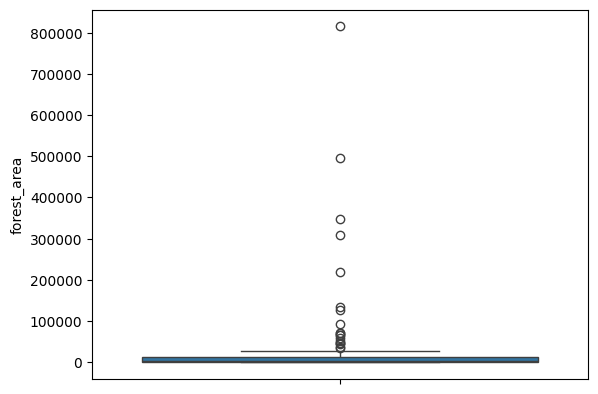

In [131]:
Q1 = lcdci_df_imputed['forest_area'].quantile(0.25)
Q3 = lcdci_df_imputed['forest_area'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

potential_outliers = lcdci_df_imputed[(lcdci_df_imputed['forest_area'] < lower_bound) | (lcdci_df_imputed['forest_area'] > upper_bound)]

sns.boxplot(y="forest_area", data=lcdci_df_imputed, showfliers=True)

potential_outliers[['country', 'forest_area']]

,country,freshwater
13,Democratic Republic of the Congo,900.0
28,Madagascar,337.0
60,China,2812.9
64,India,1446.0
65,Indonesia,2018.7
68,Japan,430.0
76,Malaysia,580.0
81,Myanmar,1002.8
86,Papua New Guinea,801.0
87,Philippines,479.0


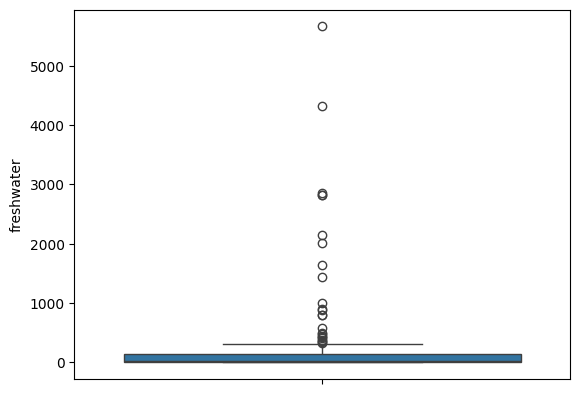

In [132]:
Q1 = lcdci_df_imputed['freshwater'].quantile(0.25)
Q3 = lcdci_df_imputed['freshwater'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

potential_outliers = lcdci_df_imputed[(lcdci_df_imputed['freshwater'] < lower_bound) | (lcdci_df_imputed['freshwater'] > upper_bound)]

sns.boxplot(y="freshwater", data=lcdci_df_imputed, showfliers=True)

potential_outliers[['country', 'freshwater']]

,country,gdp_per_capita
89,Qatar,66858.741723
93,Singapore,77710.089237
104,United Arab Emirates,44332.340051
164,Andorra,42072.319423
165,Australia,60697.245436
166,Austria,53517.890451
167,Belgium,51850.397184
168,Canada,52515.199835
169,Denmark,69268.651798
170,Finland,53504.693648


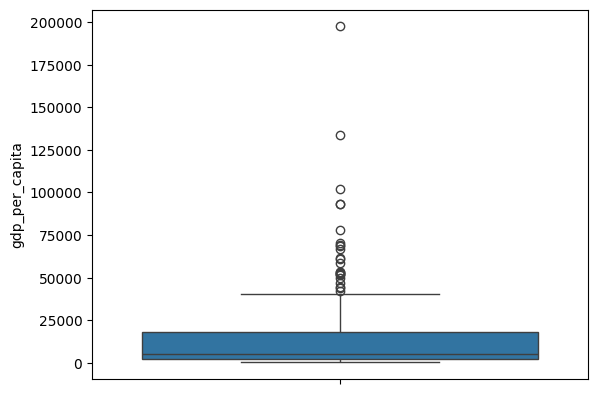

In [133]:
Q1 = lcdci_df_imputed['gdp_per_capita'].quantile(0.25)
Q3 = lcdci_df_imputed['gdp_per_capita'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

potential_outliers = lcdci_df_imputed[(lcdci_df_imputed['gdp_per_capita'] < lower_bound) | (lcdci_df_imputed['gdp_per_capita'] > upper_bound)]

sns.boxplot(y="gdp_per_capita", data=lcdci_df_imputed, showfliers=True)

potential_outliers[['country', 'gdp_per_capita']]

,country,hdi


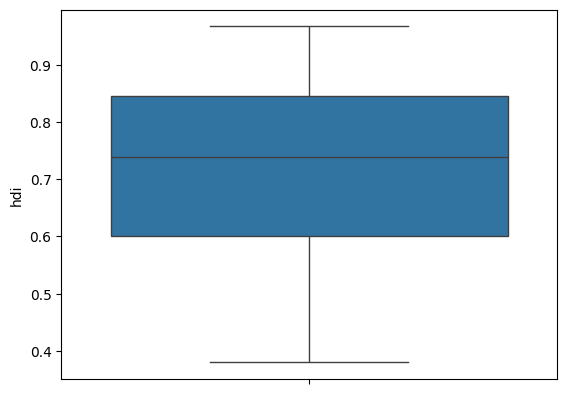

In [134]:
Q1 = lcdci_df_imputed['hdi'].quantile(0.25)
Q3 = lcdci_df_imputed['hdi'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

potential_outliers = lcdci_df_imputed[(lcdci_df_imputed['hdi'] < lower_bound) | (lcdci_df_imputed['hdi'] > upper_bound)]

sns.boxplot(y="hdi", data=lcdci_df_imputed, showfliers=True)

potential_outliers[['country', 'hdi']]

,country,cooking_clean_fuel_and_technologies_access


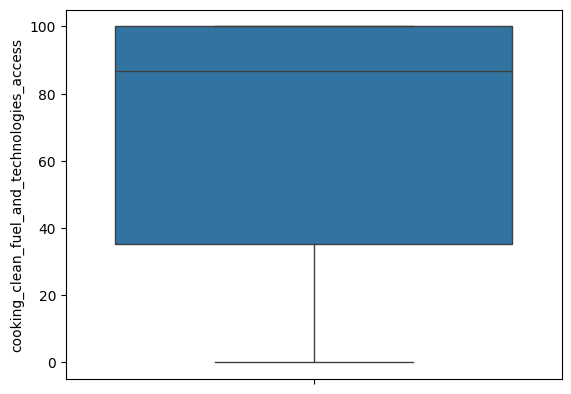

In [135]:
Q1 = lcdci_df_imputed['cooking_clean_fuel_and_technologies_access'].quantile(0.25)
Q3 = lcdci_df_imputed['cooking_clean_fuel_and_technologies_access'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

potential_outliers = lcdci_df_imputed[(lcdci_df_imputed['cooking_clean_fuel_and_technologies_access'] < lower_bound) | (lcdci_df_imputed['cooking_clean_fuel_and_technologies_access'] > upper_bound)]

sns.boxplot(y="cooking_clean_fuel_and_technologies_access", data=lcdci_df_imputed, showfliers=True)

potential_outliers[['country', 'cooking_clean_fuel_and_technologies_access']]

,country,renewable_energy_consumption


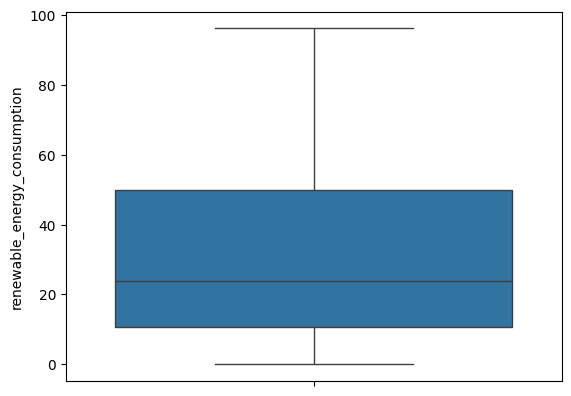

In [136]:
Q1 = lcdci_df_imputed['renewable_energy_consumption'].quantile(0.25)
Q3 = lcdci_df_imputed['renewable_energy_consumption'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

potential_outliers = lcdci_df_imputed[(lcdci_df_imputed['renewable_energy_consumption'] < lower_bound) | (lcdci_df_imputed['renewable_energy_consumption'] > upper_bound)]

sns.boxplot(y="renewable_energy_consumption", data=lcdci_df_imputed, showfliers=True)

potential_outliers[['country', 'renewable_energy_consumption']]

,country,co2_emissions
15,Egypt,210752.3
44,South Africa,393241.6
60,China,10944686.2
64,India,2200836.3
65,Indonesia,563197.0
66,Iran (Islamic Republic of),616561.3
68,Japan,1014064.7
70,Kazakhstan,211896.7
76,Malaysia,245139.3
84,Pakistan,184111.2


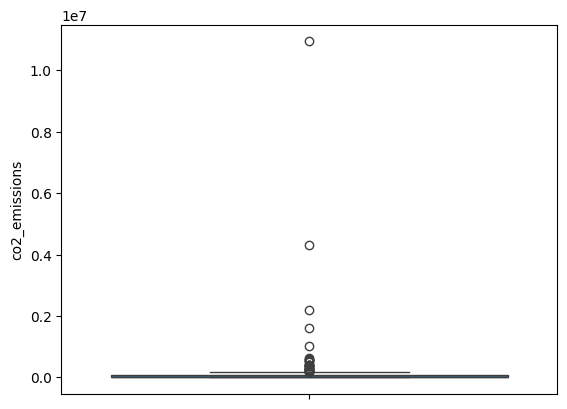

In [137]:
Q1 = lcdci_df_imputed['co2_emissions'].quantile(0.25)
Q3 = lcdci_df_imputed['co2_emissions'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

potential_outliers = lcdci_df_imputed[(lcdci_df_imputed['co2_emissions'] < lower_bound) | (lcdci_df_imputed['co2_emissions'] > upper_bound)]

sns.boxplot(y="co2_emissions", data=lcdci_df_imputed, showfliers=True)

potential_outliers[['country', 'co2_emissions']]

,country,methane_emissions
0,Algeria,8.654392e+04
18,Ethiopia,9.464558e+04
37,Nigeria,1.510598e+05
56,Bangladesh,8.890400e+04
60,China,1.186285e+06
64,India,6.976547e+05
65,Indonesia,3.339949e+05
66,Iran (Islamic Republic of),1.746420e+05
67,Iraq,8.591697e+04
84,Pakistan,1.694282e+05


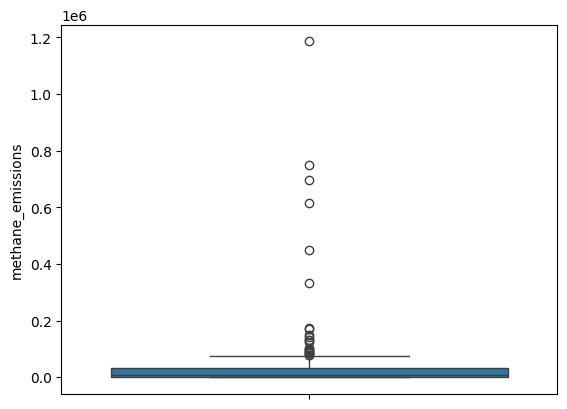

In [138]:
Q1 = lcdci_df_imputed['methane_emissions'].quantile(0.25)
Q3 = lcdci_df_imputed['methane_emissions'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

potential_outliers = lcdci_df_imputed[(lcdci_df_imputed['methane_emissions'] < lower_bound) | (lcdci_df_imputed['methane_emissions'] > upper_bound)]

sns.boxplot(y="methane_emissions", data=lcdci_df_imputed, showfliers=True)

potential_outliers[['country', 'methane_emissions']]

,country,nitrous_oxide_emissions
7,Cameroon,62399.45337
18,Ethiopia,53761.30355
37,Nigeria,41196.30278
60,China,536920.21030
64,India,279003.79150
65,Indonesia,75595.64259
66,Iran (Islamic Republic of),39719.80826
84,Pakistan,68971.75355
101,Turkey,38132.07296
126,Russian Federation,69231.05118


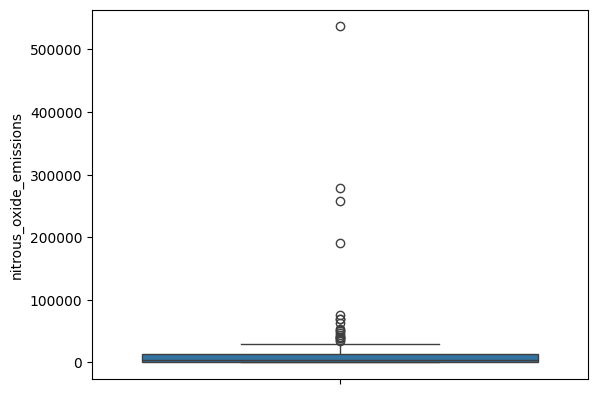

In [139]:
Q1 = lcdci_df_imputed['nitrous_oxide_emissions'].quantile(0.25)
Q3 = lcdci_df_imputed['nitrous_oxide_emissions'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

potential_outliers = lcdci_df_imputed[(lcdci_df_imputed['nitrous_oxide_emissions'] < lower_bound) | (lcdci_df_imputed['nitrous_oxide_emissions'] > upper_bound)]

sns.boxplot(y="nitrous_oxide_emissions", data=lcdci_df_imputed, showfliers=True)

potential_outliers[['country', 'nitrous_oxide_emissions']]

In [140]:
lcdci_df_imputed.to_csv("lcdci.csv", index=False)